# Data Visualisation

This notebook is dedicated to explore the various factors and the correlations with diabetes diagnosis outcomes.
The analysis aims to distinguish the relationship for different factors affecting postive diabetes diagnosis.

## Importing Libraries

In [71]:
# Import necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Initial Obervations

In [72]:
#Load the dataset
diabetes_data = pd.read_csv('cleaned_diabetes_data.csv')

#Display teh dataframe inormation to understand the structure and data types
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

 From the dataframe infromation, we can make several initial obervations about our dataset.
- Number of entiries: 520 in total
- Number of columns: 17. 
Excluding 'class' which is the daiebtes diagnosis outcome, there will be a total of 16 factors that we will be exploring to find the relationship with diabetes outcomes. 
- Data Types: Except 'Age', the other factors are catergorical data. 

In [73]:
#Diaplay the first few rows of dataset 
diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


By displaying the first five row of dataset, it provides a preliminary insight into the different types of columns and values. We ensure that the data is in consistent format and is ready for analysis.

## Defining Function

As we noticed that most of our data types are categorical, we have defined a custom function for visualizing this categorical data. This approach streamlines our visual analysis and ensures consistency throughout our analysis. The function contains a pie chart and a bar chart.

In [74]:
def plot_combined(data, pie_value, pie_title, pie_labels, bar_column, bar_title, xlabel, ylabel, hue_column):
    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Pie chart on the first subplot
    ax1.pie(
        pie_value.value_counts().loc[pie_labels],
        startangle=90,
        labels=pie_labels,
        autopct=lambda p: f'{p:.2f}%\n{p*sum(pie_value.value_counts())/100 :.0f} items',
        colors=['#1f77b4', '#ff7f0e']  # Default blue and orange from seaborn's color palette
    )
    ax1.set_title(pie_title)

    # Bar chart on the second subplot
    # Define custom colors for 'Positive' and 'Negative'
    custom_palette = {'Positive': '#e6550d', 'Negative': '#3182bd'}
    
    # Ensure the bars are ordered with 'No' first and then 'Yes'
    bar_order = ['No', 'Yes']

    # Create the countplot with the specified order and custom palette
    sb.countplot(x=bar_column, hue=hue_column, data=data, ax=ax2, palette=custom_palette, order=bar_order)
    ax2.set_title(bar_title)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)

    # Create and add the legend with custom colors
    positive_patch = mpatches.Patch(color=custom_palette['Positive'], label='Positive')
    negative_patch = mpatches.Patch(color=custom_palette['Negative'], label='Negative')
    ax2.legend(handles=[positive_patch, negative_patch], title='Diabetes Diagnosis')

    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

## Comprehensive Factor-by-Factor Analysis with Diabetes Diagnosis Outcomes
The following below explore each factor's impact on diabetes diagnosis, accompanied by visualizations and statistical tests to assess their significance. All variables execpt 'Age' and 'Gender' will be using the function we have declared above to perform data visualisation.

## 1. Age

Since 'Age' is a numerical data type, we visualise the distribution using a histogram combined with a kernel density estimate (KDE).


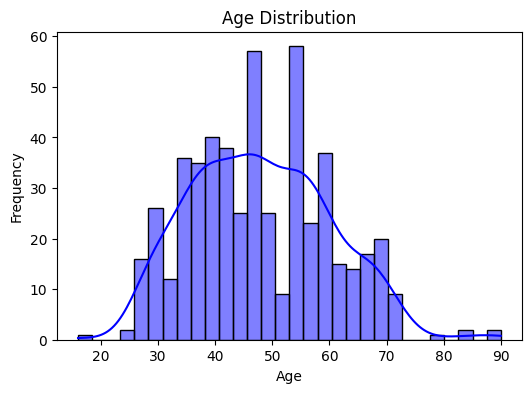

In [75]:
# Set the size of the plot
plt.figure(figsize=(6, 4))
# Create a histogram with a KDE overlay for the 'Age' variable
sb.histplot(diabetes_data['Age'], kde=True, bins=30, color='blue')
# Set the title of the histogram
plt.title('Age Distribution')
# Label the x-axis as 'Age'
plt.xlabel('Age')
# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')
# Display the plot
plt.show()

The histogram shows the distribution of ages within the dataset.

- **Distribution Shape**

    Histogram shows a right-skewed (positive skewed) distribution. Larger number of individuals are in the younger age groups, with a gradual decrease as age increases. 
- **Central Tendency**
    
    The mode appears to be in the 50s, implying that it is the most common age in dataset. The skewness indicates that the mean age is likely to be slightly higher than the median due to the tail on the right.
- **Variability**
    
    The age values are spread out, implying variability im the dataset, with a tendency to cluster around the middle age range. 
- **Outliers and Extremes**
    
    Individuals above 70 and above have lower frequencies. It could be considered outliers. 
- **Data Density**
    
    The KDE line shows that density of data points in highest about the mode and decreases as age increases. 

The dataset indicates that middle aged individuals are a key demographic in the study. 


## 2. Gender
Gender is a categorical variable with 2 categories: female and male. Since the categories differ from the previous defined function which cater for yes/no categories, we create a code for gender to plot out pie chart and bar bar chart.

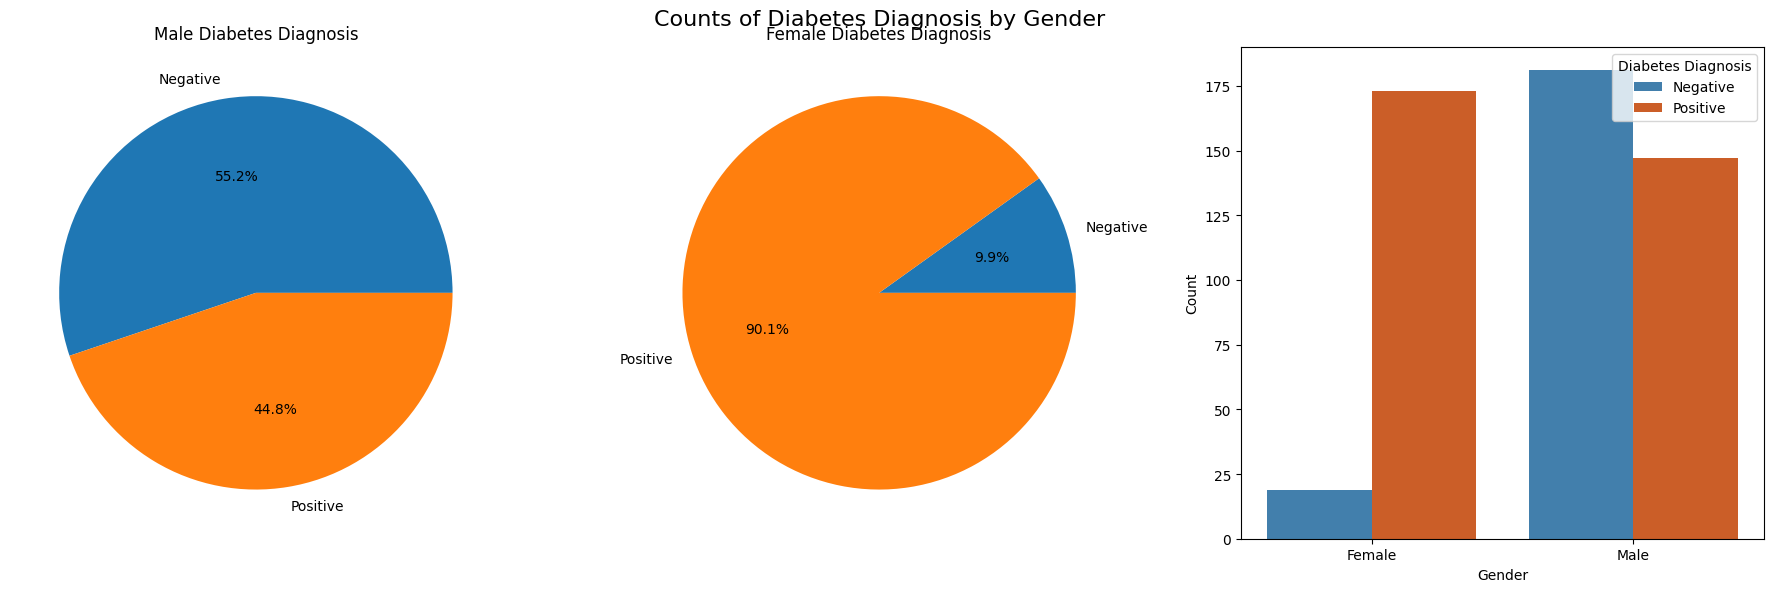

In [76]:
def plot_gender_diagnosis_combined(data, gender_col, diagnosis_col, title):
    # Ensure correct labels for Gender and Diagnosis columns if needed
    # data[diagnosis_col] = data[diagnosis_col].map({'Positive': 'Yes', 'Negative': 'No'})

    # Calculate counts for each gender-diagnosis combination
    count_data = data.groupby([gender_col, diagnosis_col]).size().reset_index(name='Count')

    # Create a figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Pie chart for Male
    male_data = count_data[count_data[gender_col] == 'Male']
    male_diagnosis_counts = male_data.groupby(diagnosis_col)['Count'].sum()
    male_diagnosis_labels = male_diagnosis_counts.index.tolist()
    ax1.pie(male_diagnosis_counts, labels=male_diagnosis_labels, autopct='%1.1f%%')
    ax1.set_title(f'Male Diabetes Diagnosis')

    # Pie chart for Female
    female_data = count_data[count_data[gender_col] == 'Female']
    female_diagnosis_counts = female_data.groupby(diagnosis_col)['Count'].sum()
    female_diagnosis_labels = female_diagnosis_counts.index.tolist()
    ax2.pie(female_diagnosis_counts, labels=female_diagnosis_labels, autopct='%1.1f%%')
    ax2.set_title(f'Female Diabetes Diagnosis')

    # Bar plot
    palette = {'Positive': '#e6550d', 'Negative': '#3182bd'}  # Custom darker colors for positive and negative
    sb.barplot(x=gender_col, y='Count', hue=diagnosis_col, data=count_data, ax=ax3, palette=palette)
    ax3.set_xlabel('Gender')
    ax3.set_ylabel('Count')
    ax3.legend(title='Diabetes Diagnosis')

    # Add overall title
    fig.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()

# Usage of the function
# Assuming 'Gender' is the gender column and 'class' is the diagnosis column
plot_gender_diagnosis_combined(
    diabetes_data, 'Gender', 'class', 'Counts of Diabetes Diagnosis by Gender'
)

The visualisation presents the distribution of diabetes diagnosis across **genders** using pie charts and bar graph. 

**Male Diabetes Diagnosis - Pie Chart**
- The male population in almost evenly split with a slight majority of negative diagnoses (55.2%) compared to positive diagnoses (44.8%). 

**Female Diabetes Diagnosis - Pie Chart**
- The female population has a significant difference with most females having positive diagnoses (90.1%) and a minority having negative diagnoses (9.9%). 

**Gender vs Diabetes Diagnosis - Bar Chart**
- The bar chart shows the count of negative and positive diagnoses for both genders. 
- Females have a significantly higher count of positive diagnoses compared to males.
- Males only have a slightly higher count of negative diagnoses. 

The data highlights a significant gender disparity in diabetes diagnoses, with females being diagnosed with diabetes at a much higher rate compared to males. 


## 3. Polyuria
Polyuria is a condition that makes one produce too much urine, often more than 3 times a day. 

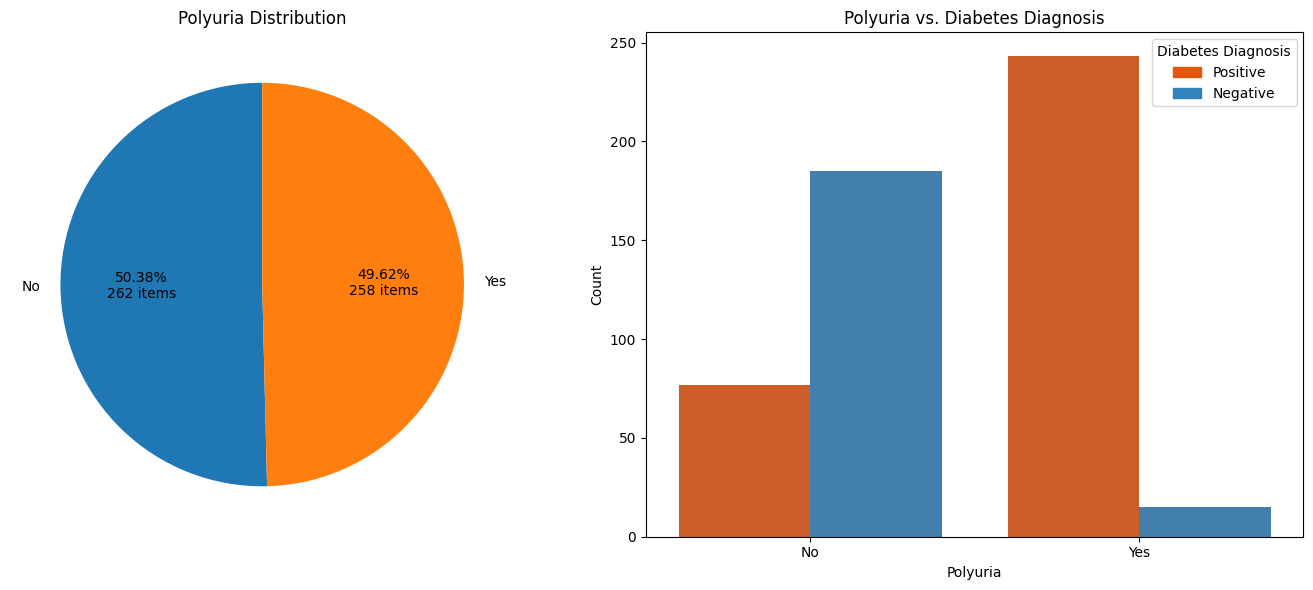

In [77]:
plot_combined(
    diabetes_data,
    diabetes_data['Polyuria'],
    'Polyuria Distribution',
    ['No', 'Yes'],
    'Polyuria',
    'Polyuria vs. Diabetes Diagnosis',
    'Polyuria',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Polyuria** using pie charts and bar graph. 

**Diabetes Diagnosis with Polyuria - Pie Chart**
- The pie chart shows an almost equal distribution between individuals experiencing polyuria (49.62%) and not experiencing it (50.38%). There are slightly more individuals without polyuria than those with polyuria.

**Polyuria vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without polyuria.
- For those without polyuria, the count of negative diagnoses is almost twice as many than the positive diagnoses. This suggests that the absence of polyuria is associated with a lower rate of diabetes diagnoses.
- For those with polyuria, majority of individuals have a positive diagnosis of diabetes, and only a minority of them have a negative diagnosis. There is a strong contrast between the 2 bars for 'Yes', suggesting a strong association between the present condition of polyuria and positive diagnoses.

The data seems to indicate that there is a potential association between polyuria and diabetes. Individuals with polyuria have a higher likelihood of having a positive diabetes diagnosis compared to those without polyuria.

## 4. Polydipsia
Polydipsia is a medical name for the feeling of extreme thirstiness.

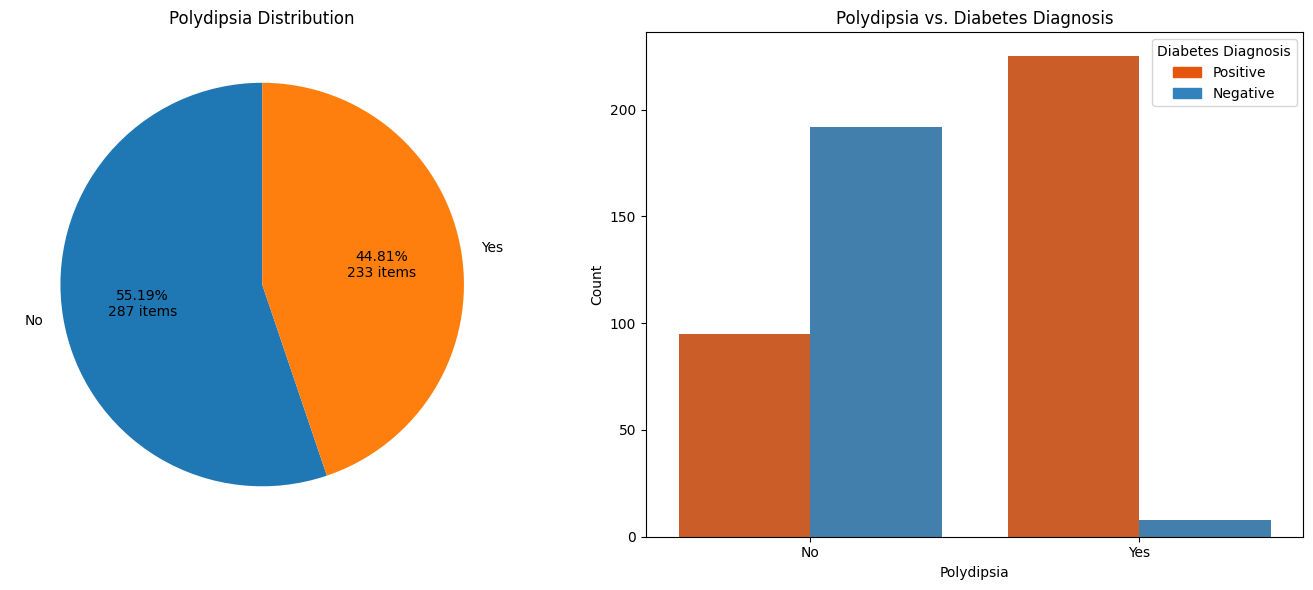

In [78]:
plot_combined(
    diabetes_data,
    diabetes_data['Polydipsia'],
    'Polydipsia Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'Polydipsia',
    'Polydipsia vs. Diabetes Diagnosis',
    'Polydipsia',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Polydipsia** using pie charts and bar graph. 

**Diabetes Diagnosis with Polydipsia - Pie Chart**
- The pie chart shows a slightly uneven distribution with slight more individuals not experiencing Polydipsia (55.19%) compared to individuals experiencing it (44.81%). 

**Polydipsia vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Polydipsia.
- For those without Polydipsia, the count of negative diagnoses is almost twice as many than the positive diagnoses. This suggests that the absence of Polydipsia is associated with a lower rate of diabetes diagnoses.
- For those with Polydipsia, majority of individuals have a positive diagnosis of diabetes, and only a minority of them have a negative diagnosis. There is a strong contrast between the 2 bars for 'Yes', suggesting a strong association between the present condition of Polydipsia and positive diagnoses.

The data seems to indicate that there is a potential association between polyuria and diabetes. Individuals with Polydipsia have a higher likelihood of having a positive diabetes diagnosis compared to those without Polydipsia.

## 5. Sudden Weight Loss
Sudden weight loss is the the unintentional loss of body weight over a short period of time.

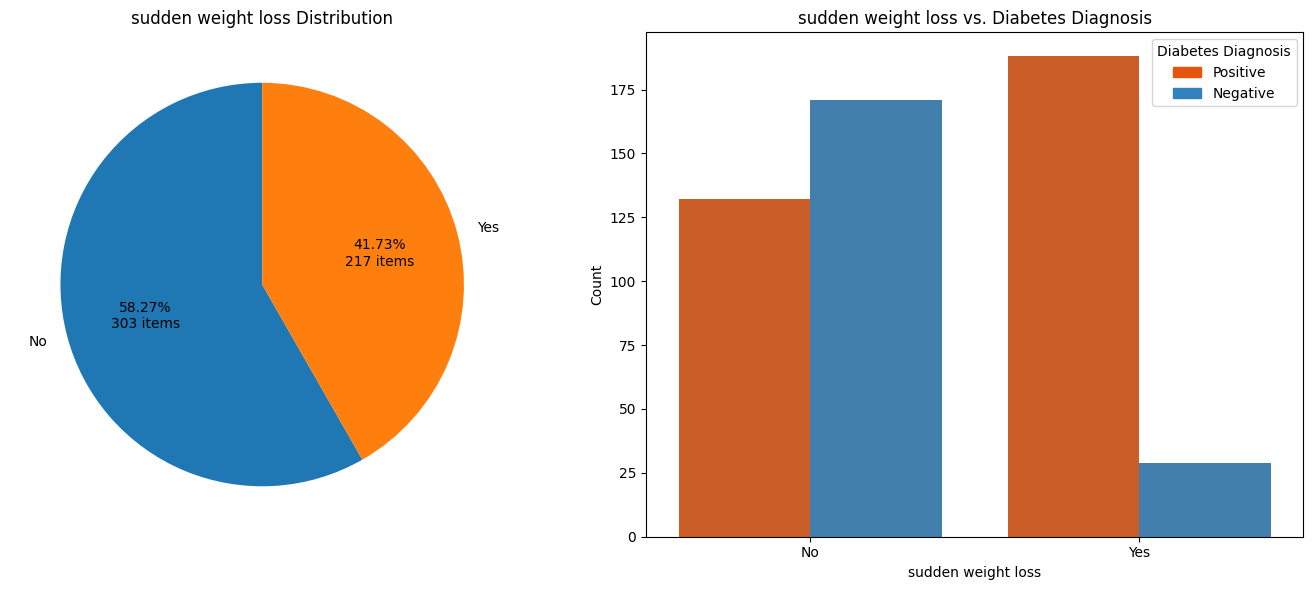

In [79]:
plot_combined(
    diabetes_data,
    diabetes_data['sudden weight loss'],
    'sudden weight loss Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'sudden weight loss',
    'sudden weight loss vs. Diabetes Diagnosis',
    'sudden weight loss',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Sudden Weight Loss** using pie charts and bar graph. 

**Diabetes Diagnosis with Sudden Weight Loss - Pie Chart**
- The pie chart shows that there are slightly more individuals without sudden weight loss (58.27%) than individuals with sudden weight loss (41.73%).

**Sudden Weight Loss vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without sudden weight loss.
- For those without sudden weight loss, the count of negative diagnoses is higher than the count of positive diagnoses. However, the difference is not as significant compared to the previous bar graphs.
- For those with sudden weight loss, majority of individuals have a positive diagnosis of diabetes, and only a minority of them have a negative diagnosis. There is a strong contrast between the 2 bars for 'Yes', suggesting a strong association between the present condition of sudden weight loss and positive diagnoses.


The data seems to indicate that there is a potential association between sudden weight loss and diabetes. Individuals with sudden weight loss have a higher likelihood of having a positive diabetes diagnosis compared to those without sudden weight loss. 

## 6. Weakness
Weakness refer to one's lack of strength or potency.

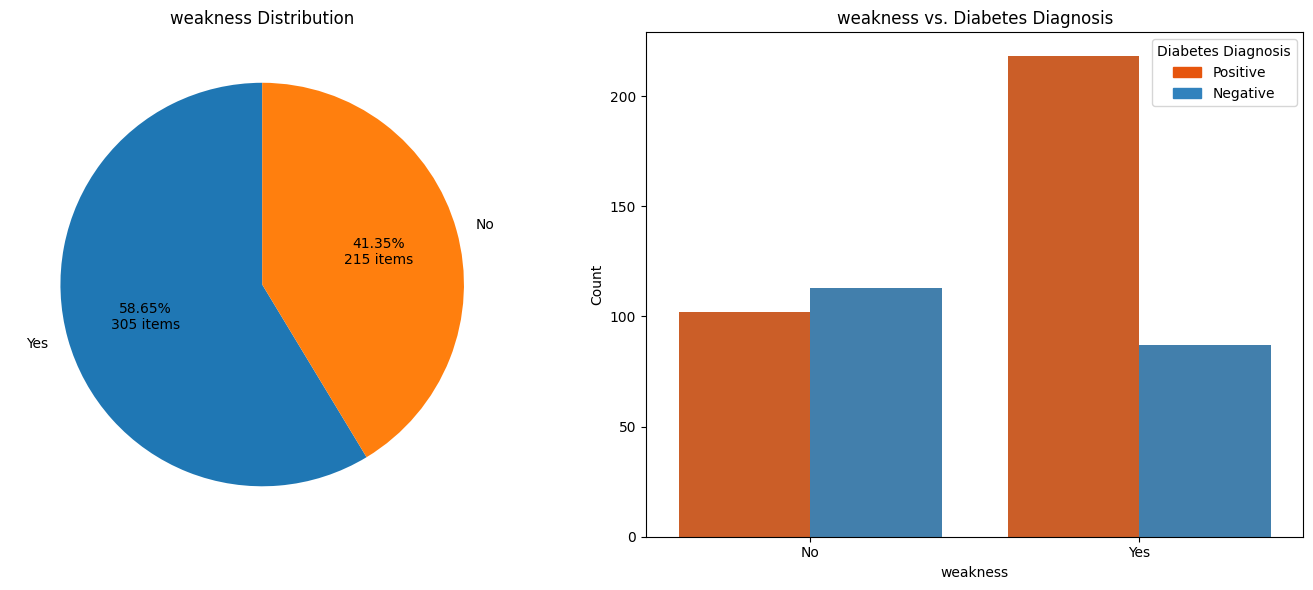

In [80]:
plot_combined(
    diabetes_data,
    diabetes_data['weakness'],
    'weakness Distribution',
    ['Yes', 'No'],  # Reversed order of pie_labels
    'weakness',
    'weakness vs. Diabetes Diagnosis',
    'weakness',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Weakness** using pie charts and bar graph. 

**Diabetes Diagnosis with Weakness - Pie Chart**
- The pie chart shows that there are slightly more individuals with weakness (58.65%) than individuals without weakness (41.35%).

**Weakness vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without weakness. 
- For those without weakness, the count of negative diagnoses is slightly higher than the count of positive diagnoses. The difference is subtle. 
- For those with weakness, majority of individuals have a positive diagnosis of diabetes. The count of positive diagnoses is more than twice the count of negative diagnoses, suggesting a strong association betweem the present condition of weakness and positive diagnoses. 

The data seems to indicate that there is a potential association between weakness and diabetes. Individuals with weakness have a higher likelihood of having a positive diabetes diagnosis compared to those without weakness.

## 7. Polyphagia
Polyphagia is a feeling of extreme, insatiable hunger. 

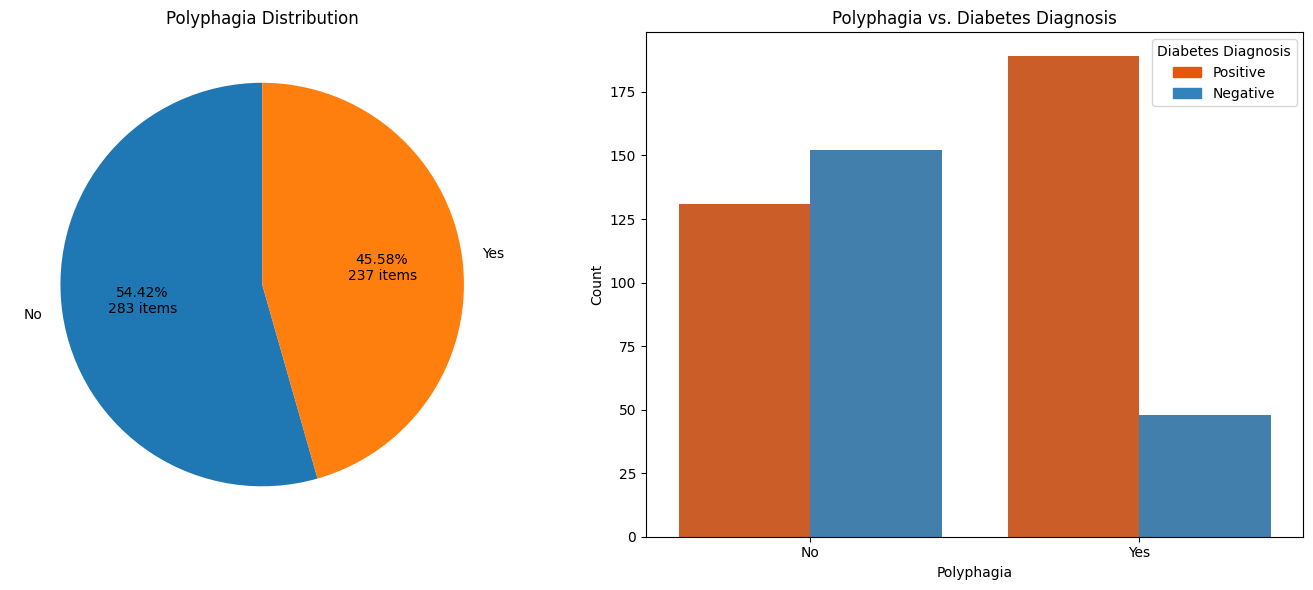

In [81]:
plot_combined(
    diabetes_data,
    diabetes_data['Polyphagia'],
    'Polyphagia Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'Polyphagia',
    'Polyphagia vs. Diabetes Diagnosis',
    'Polyphagia',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Polyphagia** using pie charts and bar graph. 

**Diabetes Diagnosis with Polyphagia - Pie Chart**
- The pie chart shows that there are slightly more individuals without Polyphagia (54.42%) than individuals with Polyphagia (45.58%).

**Polyphagia vc Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Polyphagia.
- For those without Polyphagia, the count of negative diagnoses is slightly higher than the count of positive diagnoses. The difference is subtle. 
- For those with Polyphagia, majority of individuals have a positive diagnosis of diabetes. The count of positive diagnoses is more than thrice the count of negative diagnoses, suggesting a strong association betweem the present condition of Polyphagia and positive diagnoses. 

The data seems to indicate that there is a potential association between Polyphagia and diabetes. Individuals with Polyphagia have a higher likelihood of having a positive diabetes diagnosis compared to those without Polyphagia.

## 8. Genital Thrush
Genital Thrush is a common yeast infection that affects men and women.

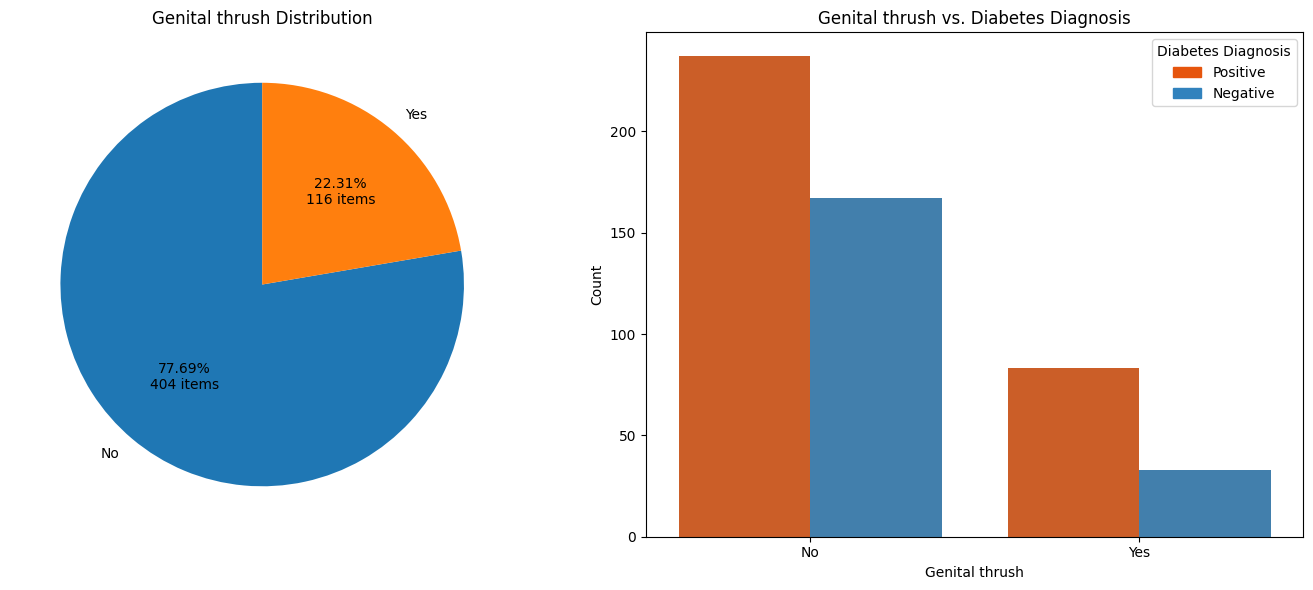

In [82]:
plot_combined(
    diabetes_data,
    diabetes_data['Genital thrush'],
    'Genital thrush Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'Genital thrush',
    'Genital thrush vs. Diabetes Diagnosis',
    'Genital thrush',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Genital Thrush** using pie charts and bar graph. 

**Diabetes Diagnosis with Genital Thrush - Pie Chart**
- The pie chart shows that there are significant individuals without Genital Thrush (77.69%) than individuals with Genital Thrush (22.31%).
- About three quarters of individuals without Genital Thrust. 

**Genital Thrush vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Genital Thrush.
- For those without Genital Thrush, the count of positive diagnoses is much higher than the count of negative diagnoses. 
- For those without Genital Thrush, the count of positive diagnoses is higher than count of negative diagnoses. 
- It is notable that majority of individuals does not experience Gential Thrush. 

The data does not show any potential association between Genital Thrush and diabetes. There is no obvious links between the presence of Genital Thrush and diabetes.

## 9. Visual Blurring
Visual Blurring is when one is unable to see things clearly.

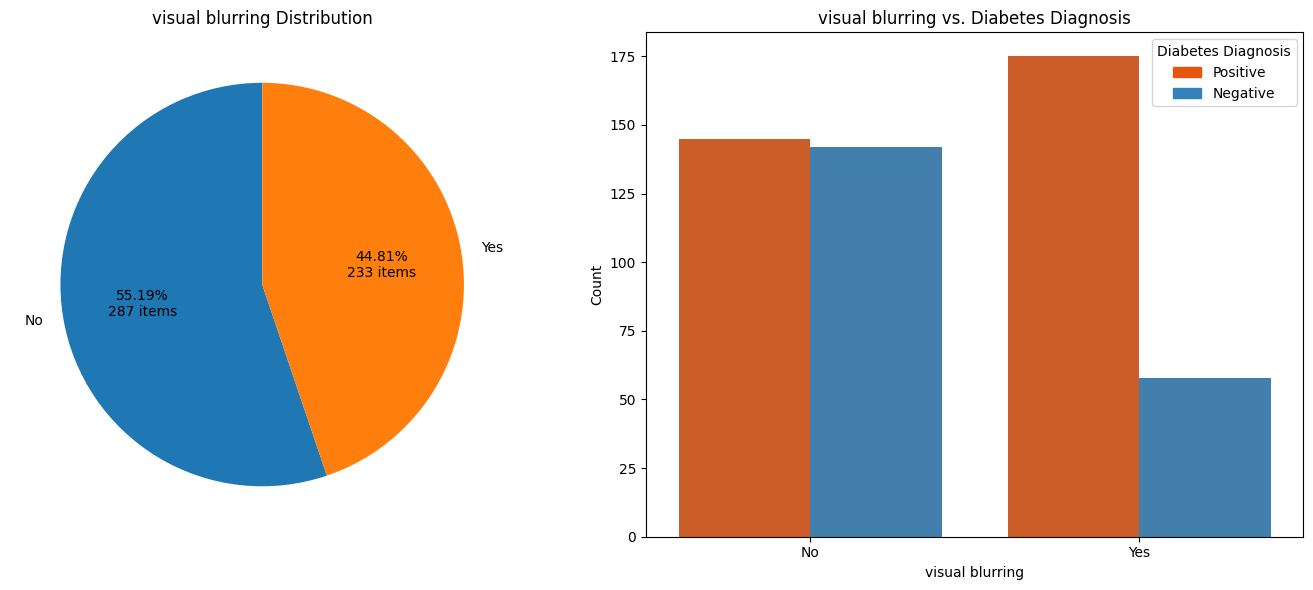

In [83]:
plot_combined(
    diabetes_data,
    diabetes_data['visual blurring'],
    'visual blurring Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'visual blurring',
    'visual blurring vs. Diabetes Diagnosis',
    'visual blurring',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Visual Blurring** using pie charts and bar graph. 

**Diabetes Diagnosis with Visual Blurring - Pie Chart**
- The pie chart shows that there are slightly more individuals without Visual Blurring (55.19%) than individuals with Visual Blurring (44.81%).

**Visual Blurring vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Visual Blurring.
- For those without Visual Blurring, the count of both positive and negative diagnoses are approximately the same, with positive diagnoses slightly higher. THe difference is very subtle.
- For those with Visual Blurring, majority of individuals have a positive diagnosis of diabetes. The count of positive diagnoses is more than twice the count of negative diagnoses, suggesting a strong association betweem the present condition of Visual Blurring and positive diagnoses. 

The data seems to indicate that there is a potential association between Visual Blurring and diabetes. Individuals with Visual Blurring have a higher likelihood of having a positive diabetes diagnosis compared to those without Visual Blurring.

## 10. Itching
Itching is an  uncomfortable sensation on the skin that causes a desire to scratch.

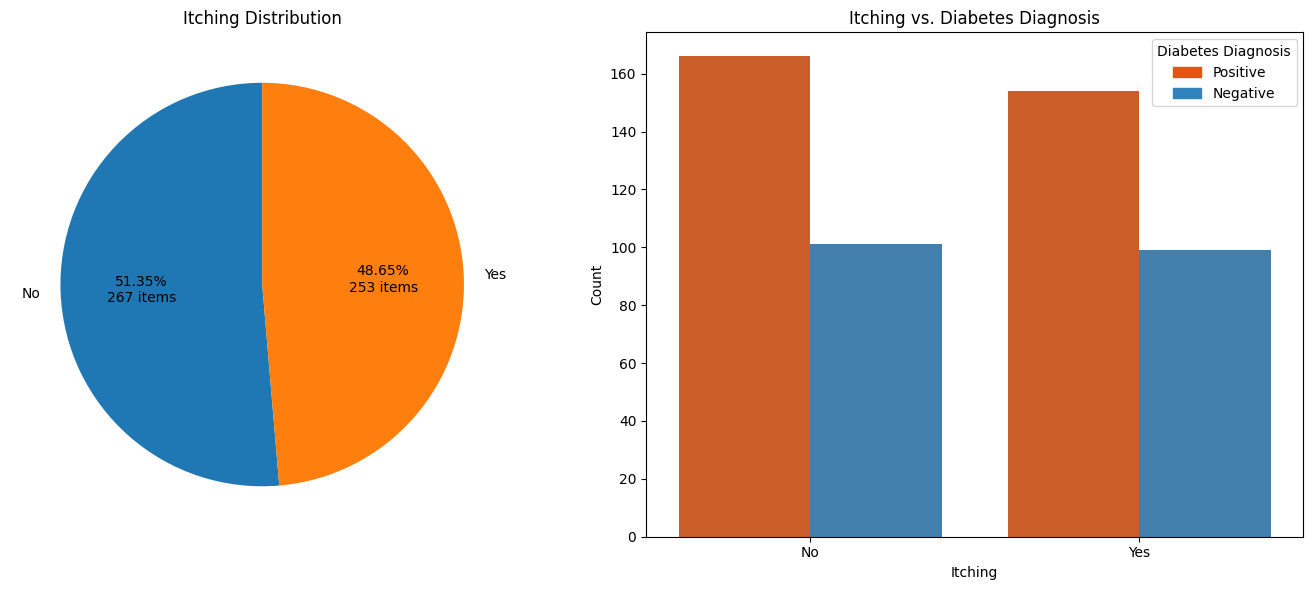

In [84]:
plot_combined(
    diabetes_data,
    diabetes_data['Itching'],
    'Itching Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'Itching',
    'Itching vs. Diabetes Diagnosis',
    'Itching',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Itching** using pie charts and bar graph. 

**Diabetes Diagnosis with Itching - Pie Chart**
- The pie chart shows that there are slightly more individuals without Itching (51.35%) than individuals with Itching (48.65%).

**Itching vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Itching.
- For those without Itching, the counts for positive diagnoses are considerably higher than the counts for negative diagnoses. 
- For those with Itching, the the counts for positive diagnoses are also considerably higher than the counts for negative diagnoses. 

With both 'Yes' and 'No' having identical columns, it does not suggest a relationship between Itching and diabetes. 


## 11. Irritability
Irritability is the state of being irritable.

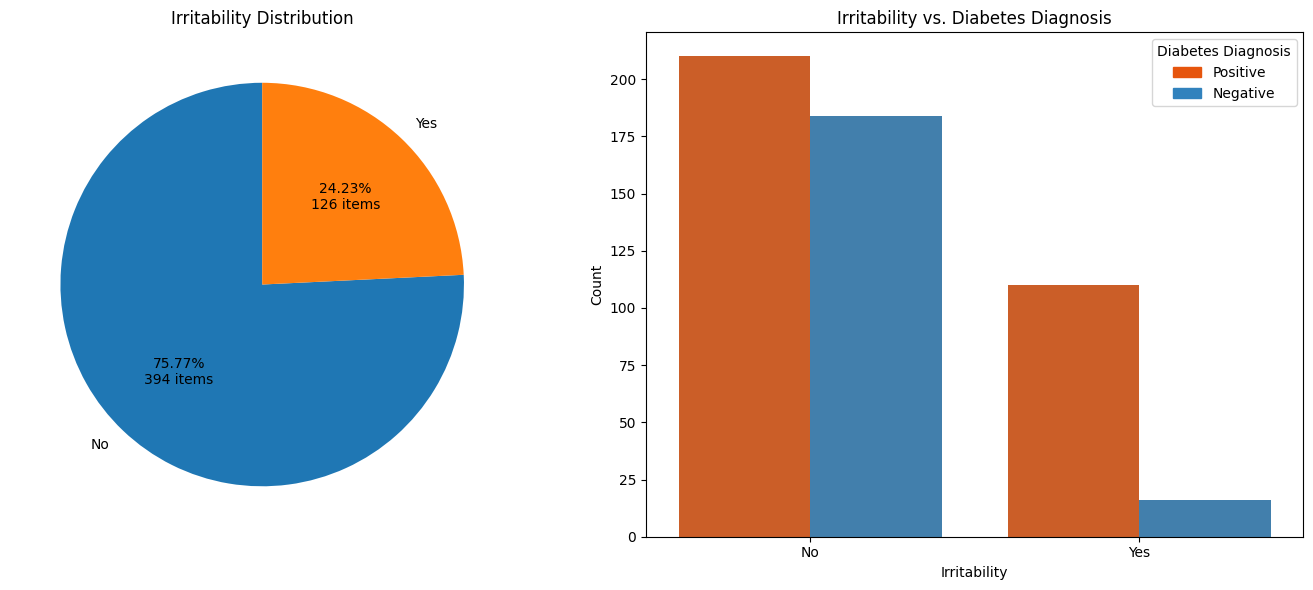

In [85]:
plot_combined(
    diabetes_data,
    diabetes_data['Irritability'],
    'Irritability Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'Irritability',
    'Irritability vs. Diabetes Diagnosis',
    'Irritability',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Irritability** using pie charts and bar graph. 

**Diabetes Diagnosis with Irritability - Pie Chart**
- The pie chart shows that there are significantly more individuals without Irritability (75.77%) than those with Irritability (24.23%). 
- About three quarters of individuals without Irritability. 

**Irritability vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Irritability.
- For those without Irritability, the count of positive diagnoses is higher than the count of negative diagnoses. However, the difference is not as significant. 
- For those with Irritability, the count of positive diagnoses is way higher than the count of negative diagnoses. The difference is very significant. 
- However, it is notable that more individuals experience without Irritability. 

The data seems to indicate that there is a potential association between Irritability and diabetes. Individuals with Irritability have a higher likelihood of having a positive diabetes diagnosis compared to those without Irritability.

## 12. Delayed Healing

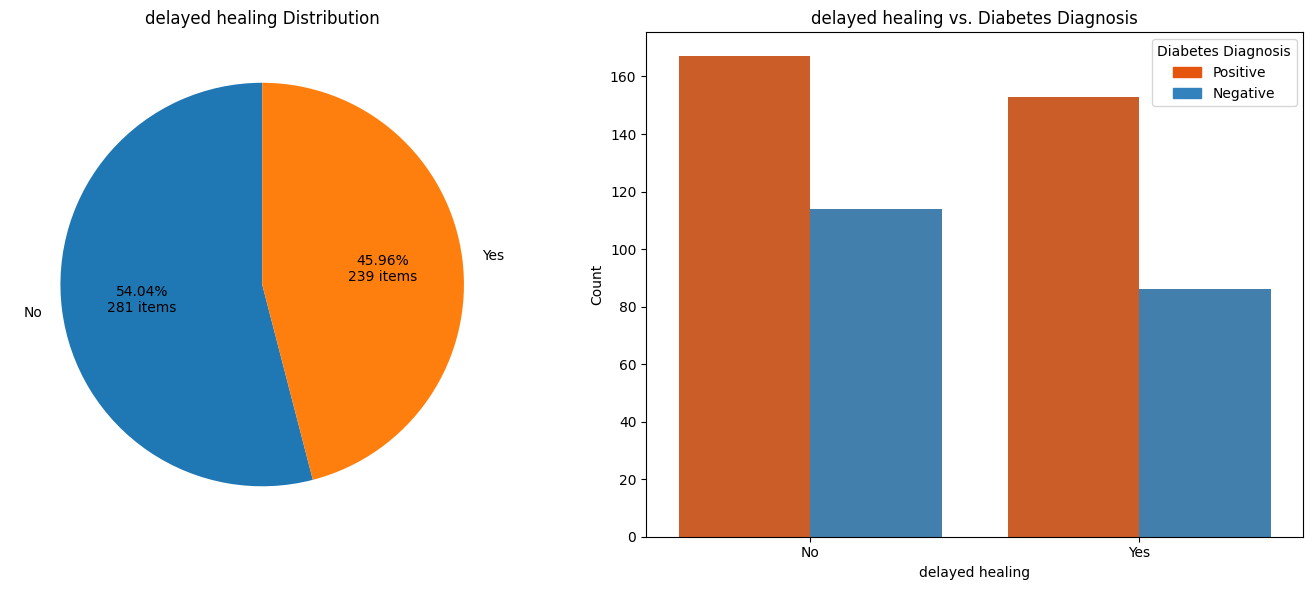

In [86]:
plot_combined(
    diabetes_data,
    diabetes_data['delayed healing'],
    'delayed healing Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'delayed healing',
    'delayed healing vs. Diabetes Diagnosis',
    'delayed healing',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Delayed Healing** using pie chart and bar graph. 

**Diabetes Diagnosis with Delayed Healing - Pie Chart**
- The pie chart shows that there are slightly more individuals without delayed healing (54.04%) than individuals with delayed healing (45.96%).

**Delayed Healing vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Delayed Healing.
- For those without delayed healing, the count of positive diagnoses is higher than negative diagnoses. 
- For those with delayed healing, the count for positive diagnoses is also higher than negative diagnoses. 

With both 'Yes' and 'No' having similar columns, it does not suggest a relationship between delayed healing and diabetes. 

## 13. Partial Paresis
Partial Paresis is a condition in which muscle movement has become weakened or impaired. 

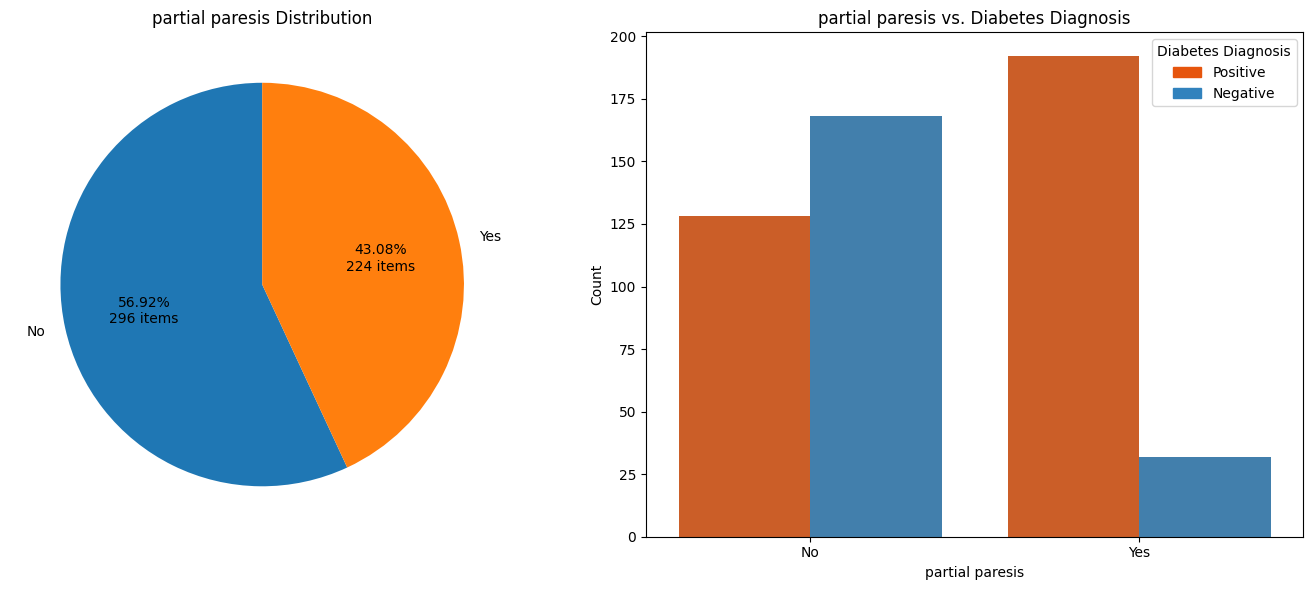

In [87]:
plot_combined(
    diabetes_data,
    diabetes_data['partial paresis'],
    'partial paresis Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'partial paresis',
    'partial paresis vs. Diabetes Diagnosis',
    'partial paresis',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Partial Paresis** using pie chart and bar graph. 

**Diabetes Diagnosis with Partial Paresis - Pie Chart**
- The pie chart shows that there are slightly more individuals without Partial Paresis (56.92%) than individuals with Partial Paresis (43.08%).

**Partial Paresis vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Partial Paresis.
- For those without Partial Paresis, the count for negative diagnoses is higher than the count for positive diagnoses. However, the difference is not as significant. 
- For those with Partial Paresis, majority individuals with Partial Paresis have positive diagnoses. The contrast between positive and negative diagnoses is very large.

The data seems to indicate that there is a potential association between Partial Paresis and diabetes. Individuals with Partial Paresis have a higher likelihood of having a positive diabetes diagnosis compared to those without Partial Paresis.


## 14. Muscle Stiffness
Muscle stiffness is the sensation of pain or tightness in your muscles. 

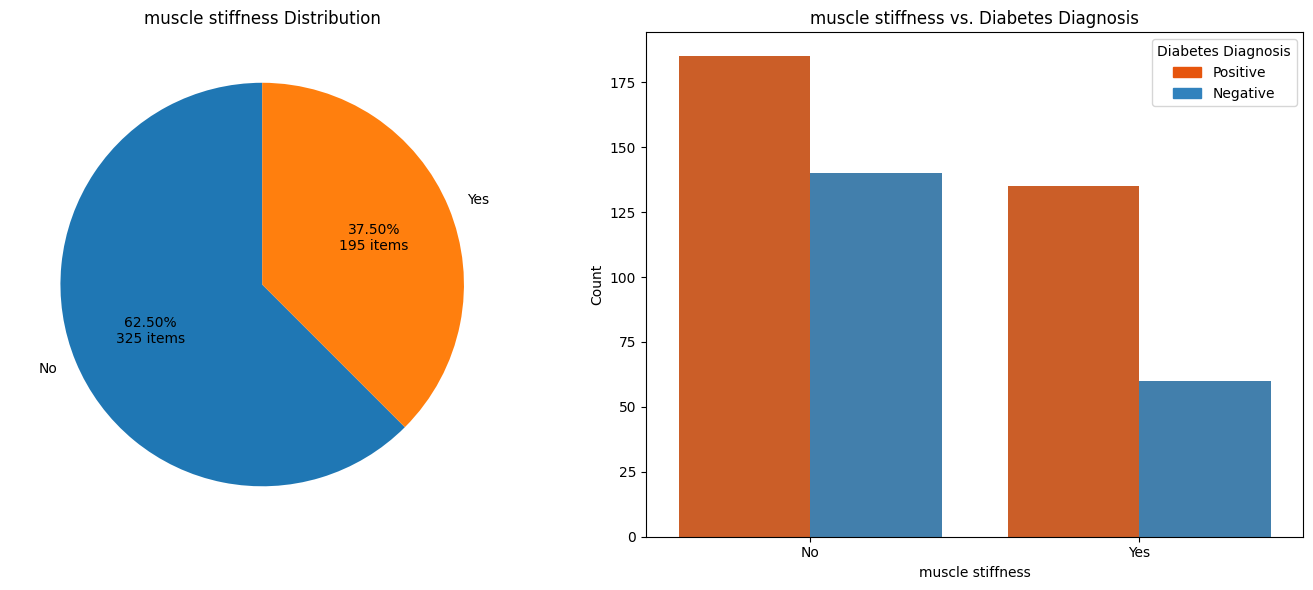

In [88]:
plot_combined(
    diabetes_data,
    diabetes_data['muscle stiffness'],
    'muscle stiffness Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'muscle stiffness',
    'muscle stiffness vs. Diabetes Diagnosis',
    'muscle stiffness',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Muscle Stiffness** using pie chart and bar graph. 

**Diabetes Diagnosis with Muscle Stiffness - Pie Chart**
- The pie chart shows that there are more individuals without Muscle Stiffness (62.50%) than individuals with Muscle Stiffness (37.50%).

**Muscle Stiffness vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Muscle Stiffness.
- For those without Muscle Stiffness, the count for positive diagnoses is higher than the count for negative diagnoses. However, the difference is not as significant.
- For those with Muscle Stiffness, the count for positive diagnoses is more than twice the count for negative diagnoses.

Since both 'Yes' and 'No' columns suggest higher count for positive than negative diagnoses, it does not have any potential association between Muscle Stiffness and diabetes. There is no obvious links between the presence of Muscle Stiffness and diabetes.


## 15. Alopecia  
Alopecia is the medical terms for hair loss, which can be temporary or permanent. 

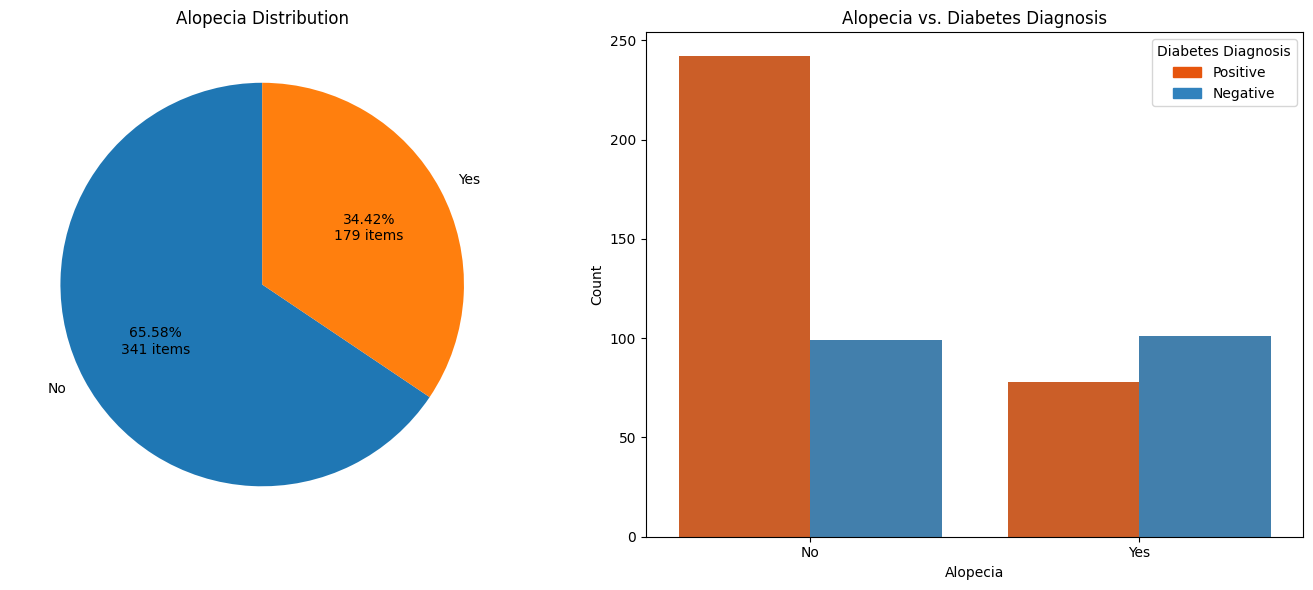

In [89]:
plot_combined(
    diabetes_data,
    diabetes_data['Alopecia'],
    'Alopecia Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'Alopecia',
    'Alopecia vs. Diabetes Diagnosis',
    'Alopecia',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Alopecia** using pie chart and bar graph. 

**Diabetes Diagnosis with Alopecia - Pie Chart**
- The pie chart shows that there are more individuals without Alopecia (65.58%) than individuals with Alopecia (34.42%).

**Alopecia vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Alopecia.
- For those without Alopecia, the count for positive diagnoses is twice as high as the count for negative diagnoses.
- For those with Alopecia, the count for negative diagnoses is slightly higher than the count for positive diagnoses. The difference is substantial. 

The data seems to indicate that there is a potential association between Alopecia and diabetes. Individuals without Alopecia have a higher likelihood of having a positive diabetes diagnosis compared to those with Alopecia.


## 16. Obesity
Obesity is a complex disease involving having too much body fat.

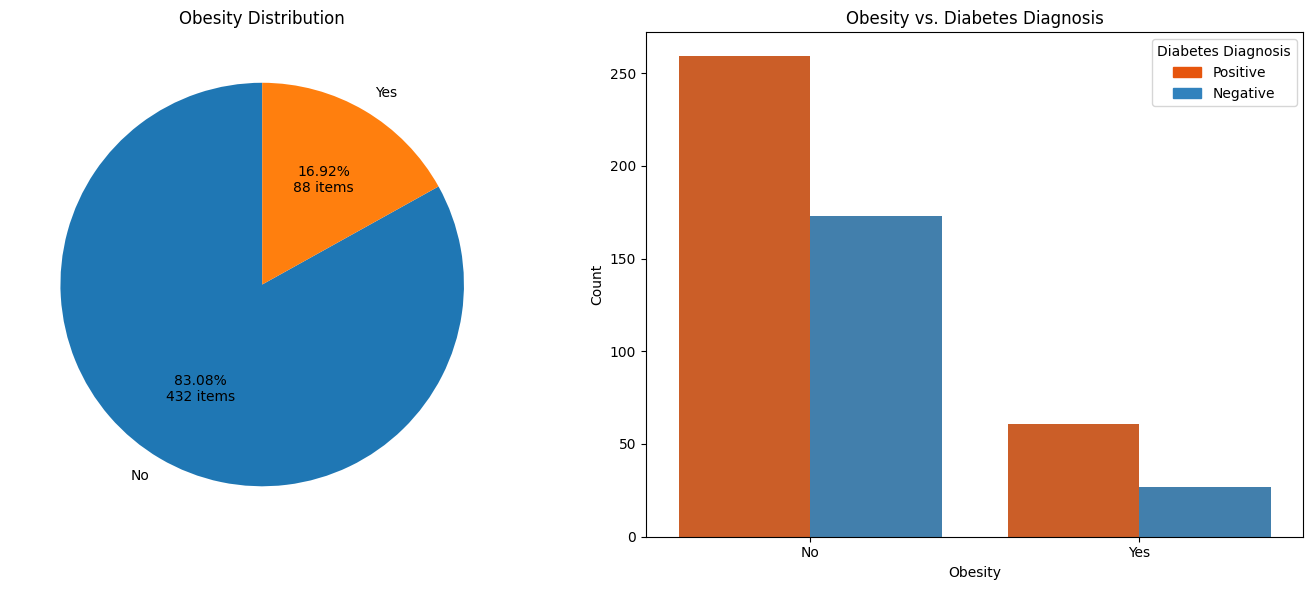

In [90]:
plot_combined(
    diabetes_data,
    diabetes_data['Obesity'],
    'Obesity Distribution',
    ['No', 'Yes'],  # Reversed order of pie_labels
    'Obesity',
    'Obesity vs. Diabetes Diagnosis',
    'Obesity',
    'Count',
    'class'  # Replace with your actual column name for diabetes diagnosis
)

The visualisation presents the distribution of diabetes diagnosis across **Obesity** using pie chart and bar graph. 

**Diabetes Diagnosis with Obesity - Pie Chart**
- The pie chart shows that there are significant number of individuals without obesity (83.08%) compared to those with obesity (16.92%).

**Obesity vs Diabetes Diagnosis - Bar Chart**
- The bar chart presents a comparison of diabetes diagnosis across individuals with and without Obesity.
- For those without obesity, the count for positve diagnoses is higher than the count for negative diagnoes. 
- For those with obesity, the count for positive diagnoses is higher than the count for negative diagnoses. 

Since both 'Yes' and 'No' columns suggest higher count for positive than negative diagnoses, it does not have any potential association between Obesity and diabetes. There is no obvious links between the presence of Obesity and diabetes.

## Correlation between features and diabetes

In [91]:
diabetes_data = pd.read_csv('cleaned_diabetes_data.csv')
objectList = diabetes_data.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [92]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in objectList:
    diabetes_data[feature] = le.fit_transform(diabetes_data[feature].astype(str))
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
 16  class               520 non-null    int32
dt

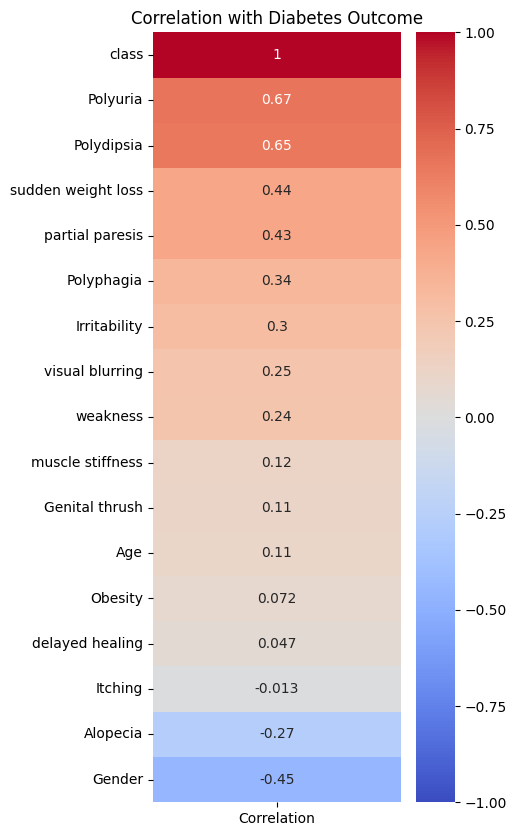

In [93]:
y = diabetes_data['class'] 
correlation_with_y = diabetes_data.corrwith(y)

# Create a DataFrame from the correlation series for better handling and sorting
corr_df = pd.DataFrame(correlation_with_y, columns=['Correlation']).sort_values(by='Correlation', ascending=False)

# Create a vertical heatmap for the correlations
plt.figure(figsize=(4, 10))  # Adjust the figure size as needed
sb.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'orientation': 'vertical'})
plt.title('Correlation with Diabetes Outcome')
plt.show()

The heatmap shows the correlation between various factors and diabetes. 
In statistics, correlation coefficients are used to measure the strength and direction of the relationship between two variables. The coefficients range from -1 to 1: 
- 1 indicates the strongest positive correlation
- 0 indicates no correlation at all
- -1 indicates the strongest negative correlation

**Polyuria:** Correlation of 0.67. This is a condition where the body urinates more than usual and passes excessive or abnormally large amounts of urine each time you urinate. This is a common symptom of diabetes and the strong positive correlation suggests it's a significant indicator of diabetes.

**Polydipsia:** Correlation of 0.65. This is excessive thirst and is another common symptom of diabetes, particularly if associated with polyuria. Again, the positive correlation is quite strong.

**Sudden Weight Loss:** Correlation of 0.44. Unexplained weight loss can also be a symptom of diabetes, due to the loss of sugar and water as the body tries to manage high blood sugar levels.

**Partial Paresis:** Correlation of 0.43. This is a condition of partial paralysis that can be associated with diabetic neuropathy, which is nerve damage resulting from diabetes.

**Polyphagia:** Correlation of 0.34. This refers to excessive hunger or increased appetite and is another symptom that can be associated with diabetes.

**Irritability:** Correlation of 0.3. Though less directly associated with diabetes than the other symptoms, it can be related to the fluctuations in blood sugar levels.

**Visual Blurring:** Correlation of 0.25. Blurry vision can be a symptom of diabetes as high blood sugar levels can cause swelling in the lenses of your eyes.

**Weakness:** Correlation of 0.24. Generalized weakness can be related to diabetes due to the inadequate use of glucose by the muscles.

**Muscle Stiffness:** Correlation of 0.12. While not a common symptom, it could be related to diabetic complications affecting muscles.

**Genital Thrush:** Correlation of 0.11. This can be a symptom of diabetes as high levels of glucose can lead to yeast infections.

**Age:** Correlation of 0.11. Age is a known risk factor for type 2 diabetes.

**Obesity:** Correlation of 0.072. It's a risk factor for type 2 diabetes, but the relatively low correlation suggests it may not be as strongly predictive as the other factors in this particular analysis.

**Delayed Healing:** Correlation of 0.047. Slow healing of wounds is a potential complication of diabetes, likely due to blood vessel damage.

**Itching:** Correlation of -0.013. This typically would not be considered a strong association with diabetes outcome, given that the correlation is nearly zero.

**Alopecia:** Correlation of -0.27. Alopecia or hair loss shows a moderate negative correlation. This suggests that in the context of this data, alopecia is less likely to be observed in those with diabetes, which may be counterintuitive and warrants further investigation.

**Gender:** Correlation of -0.45. This strong negative correlation suggests that in this dataset, one gender may have a lower rate of diabetes than the other. However, without knowing which gender is represented by which end of the scale, we can't draw a specific conclusion.

## Conclusion

**Symptoms with Strong Positive Correlation:** Polyuria and polydipsia have the strongest positive correlations with diabetes outcomes, suggesting they are significant indicators of diabetes. These symptoms are commonly associated with diabetes and should be considered as critical signs when diagnosing the condition.

**Additional Indicators:** Sudden weight loss, partial paresis, polyphagia, irritability, visual blurring, and weakness also show positive correlations, indicating they are relevant symptoms associated with diabetes, though with varying degrees of significance.

**Less Significant Factors:** Muscle stiffness, genital thrush, age, and obesity exhibit positive correlations but are less significant compared to the aforementioned symptoms. This implies that while they may be associated with diabetes outcomes, they are not as strong of indicators as others.

**Negative Correlation Factors:** Itching has a near-zero negative correlation, suggesting no significant association with diabetes outcomes. Alopecia shows a moderate negative correlation, which is counterintuitive and may require further investigation to understand its relationship with diabetes. The strong negative correlation with gender indicates a potential difference in diabetes outcomes between genders in the dataset, though the specific nature of this difference is not clarified by the chart alone.